In [73]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import models, layers
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
from PIL import Image
import os, os.path, shutil
from keras.preprocessing.image import img_to_array, ImageDataGenerator, array_to_img, load_img
from keras.utils import plot_model
import pydot
from tensorflow.keras.optimizers import RMSprop, Adam

In [74]:
# Directory with Blight pictures
blight_dir = os.path.join('./data/Blight')

# Directory with Common Rust pictures
rust_dir = os.path.join('./data/Common_Rust')

# Directory with Gray Leaf Spot pictures
gray_dir = os.path.join('./data/Gray_Leaf_Spot')

# Directory with Healthy pictures
healthy_dir = os.path.join('./data/Healthy')

In [75]:
train_blight_names = os.listdir(blight_dir)
print(train_blight_names[:5])

train_rust_names = os.listdir(rust_dir)
print(train_rust_names[:5])

train_gray_names = os.listdir(gray_dir)
print(train_gray_names[:5])

train_healthy_names = os.listdir(healthy_dir)
print(train_healthy_names[:5])

['Corn_Blight (966).jpg', 'Corn_Blight (435).JPG', 'Corn_Blight (1048).JPG', 'Corn_Blight (570).JPG', 'Corn_Blight (120).JPG']
['Corn_Common_Rust (921).JPG', 'Corn_Common_Rust (188).JPG', 'Corn_Common_Rust (472).JPG', 'Corn_Common_Rust (1151).JPG', 'Corn_Common_Rust (537).JPG']
['Corn_Gray_Spot (46).jpg', 'Corn_Gray_Spot (309).JPG', 'Corn_Gray_Spot (470).JPG', 'Corn_Gray_Spot (535).JPG', 'Corn_Gray_Spot (165).JPG']
['Corn_Health (684).jpg', 'Corn_Health (5).jpg', 'Corn_Health (391).jpg', 'Corn_Health (811).jpg', 'Corn_Health (112).jpg']


In [76]:
print('Total Blight Images:', len(os.listdir(blight_dir)))
print('Total Common Rust Images:', len(os.listdir(rust_dir)))
print('Total Gray Leaf Spot Images:', len(os.listdir(gray_dir)))
print('Total Healthy Images:', len(os.listdir(healthy_dir)))

Total Blight Images: 1146
Total Common Rust Images: 1306
Total Gray Leaf Spot Images: 574
Total Healthy Images: 1162


In [77]:
# Showing sample of Blight images
nrows = 4
ncols = 4
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

<Figure size 1152x1152 with 0 Axes>

In [78]:
# Show images displayed 4x4
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0



pic_index += 8
next_blight_pix = [os.path.join(blight_dir, fname) 
                for fname in train_blight_names[pic_index-8:pic_index]]
next_rust_pix = [os.path.join(rust_dir, fname) 
                for fname in train_rust_names[pic_index-8:pic_index]]
next_gray_pix = [os.path.join(gray_dir, fname) 
                for fname in train_gray_names[pic_index-8:pic_index]]
next_healthy_pix = [os.path.join(healthy_dir, fname) 
                for fname in train_healthy_names[pic_index-8:pic_index]]

def show_image_sample(pic_directory):
    fig = plt.gcf()
    fig.set_size_inches(ncols * 4, nrows * 4)
    for i, img_path in enumerate(pic_directory):
        sp = plt.subplot(nrows, ncols, i + 1)
        sp.axis('Off')
        img = mpimg.imread(img_path)
        plt.imshow(img)
    plt.show()

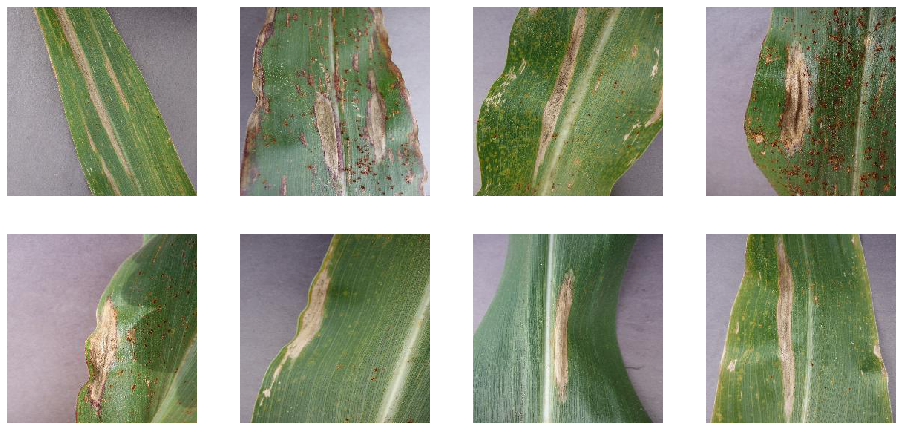

In [79]:
# Showing sample of Blight images
show_image_sample(next_blight_pix)

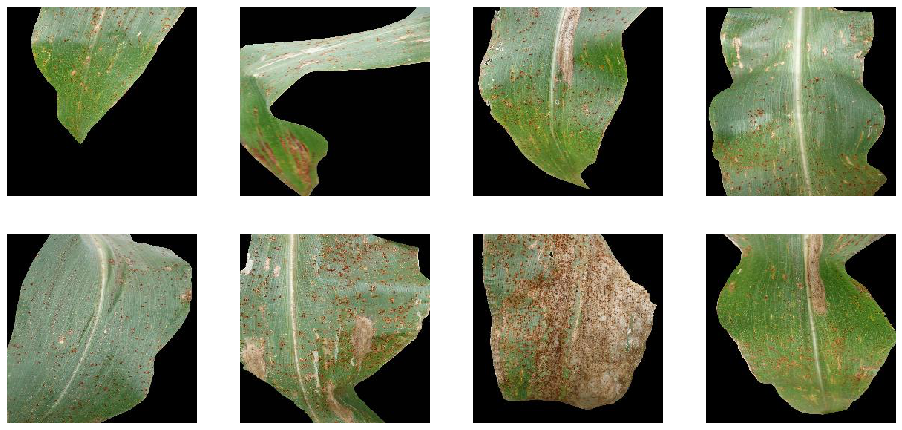

In [80]:
# Showing sample of Common Rust images
show_image_sample(next_rust_pix)

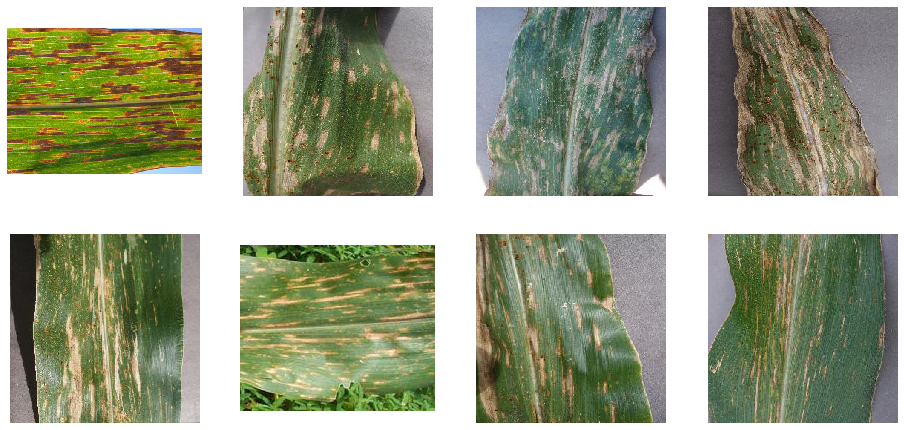

In [81]:
# Showing sample of Gray Leaf Spot images
show_image_sample(next_gray_pix)

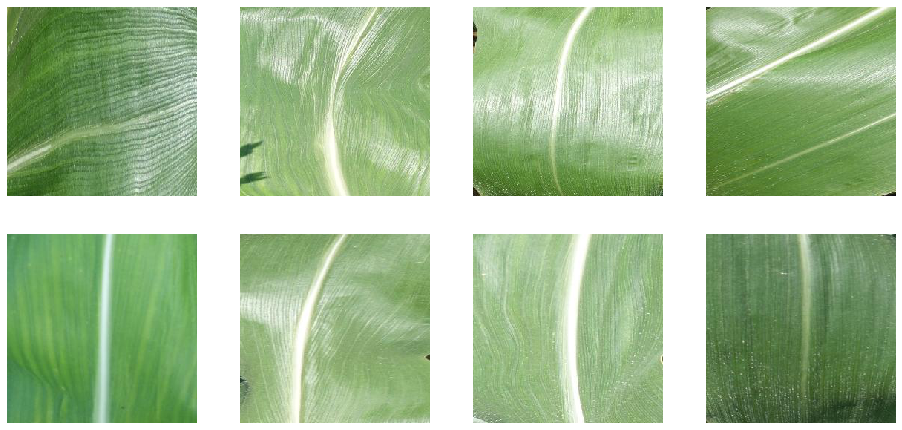

In [82]:
# Showing sample of Healthy images
show_image_sample(next_healthy_pix)

In [83]:
classes = ['Blight','Common_Rust','Gray_Leaf_Spot','Healthy']
num_epochs = 30
batch_size = 32

In [84]:
# Rescaling images by 1./255
# Splitting data into training and test sets
train_datagen = ImageDataGenerator(rescale = 1/255,
                                  validation_split = 0.2)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        subset='training')

# Flow validation images in batches
validation_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        subset='validation')

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


### CNN with One Convolutional Layer

In [85]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

In [86]:
# Compiling first model with RMSprop optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
# Training sample count
training_sample=train_generator.n
    
# Validation sample count
val_sample=validation_generator.n

In [87]:
# Training first model
model.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 32s 306ms/step - loss: 15.9966 - acc: 0.5646 - val_loss: 0.6708 - val_acc: 0.7416
Epoch 2/30
104/104 [==============================] - 32s 306ms/step - loss: 0.4234 - acc: 0.8338 - val_loss: 0.3507 - val_acc: 0.8594
Epoch 3/30
104/104 [==============================] - 32s 307ms/step - loss: 0.2511 - acc: 0.9166 - val_loss: 0.3868 - val_acc: 0.8606
Epoch 4/30
104/104 [==============================] - 32s 312ms/step - loss: 0.1554 - acc: 0.9473 - val_loss: 0.4313 - val_acc: 0.8582
Epoch 5/30
104/104 [==============================] - 32s 303ms/step - loss: 0.0929 - acc: 0.9713 - val_loss: 0.5353 - val_acc: 0.8582
Epoch 6/30
104/104 [==============================] - 33s 319ms/step - loss: 0.0560 - acc: 0.9836 - val_loss: 0.4478 - val_acc: 0.8678
Epoch 7/30
104/104 [==============================] - 32s 306ms/step - loss: 0.0703 - acc: 0.9879 - val_loss: 0.5776 - val_acc: 0.8666
Epoch 8/30
104/104 [==============================] - 

In [88]:
def viz_train_res(results):
    history = results.history.history
    plt.figure()
    plt.plot(history['val_loss'])
    plt.plot(history['loss'])
    plt.legend(['val_loss', 'loss'])
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.show()
    history = results.history.history
    plt.figure()
    plt.plot(history['val_acc'])
    plt.plot(history['acc'])
    plt.legend(['val_acc', 'acc'])
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.show()

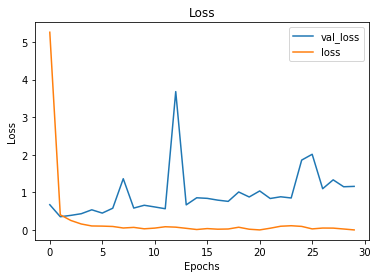

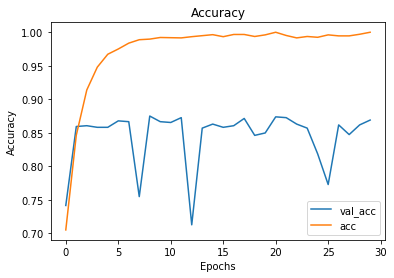

In [89]:
viz_train_res(model)

For this model, the training accuracy is quite high and the loss is quite low; however, the validation accuracy is not as high and the loss is much higher. This indicates that our model is overfitting. 

### CNN with One Convolutional Layer & Data Augmentation

One way to combat overfitting in image classification is with data augmentation. This process takes an image and changes it in various ways so that the model learns to differentiate to images in many different formats and appearances. 

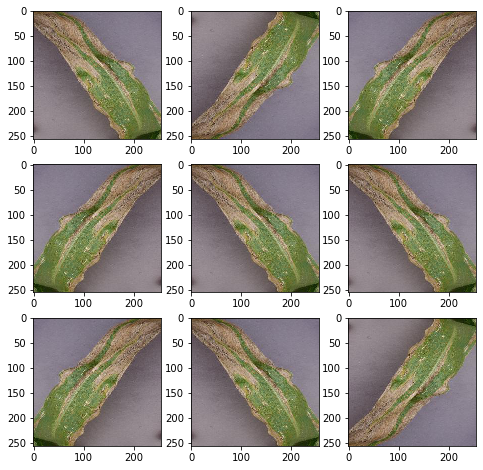

In [105]:
# Data augmentation example
# Blight leaf image
img = load_img('./data/Blight/Corn_Blight (1002).JPG')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating horizontal and vertical flips
datagen = ImageDataGenerator(horizontal_flip=True, vertical_flip=True)
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

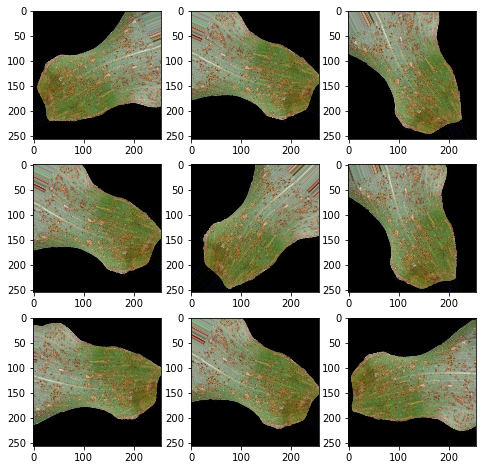

In [106]:
# Data augmentation example
# Common Rust leaf image
img = load_img('./data/Common_Rust/Corn_Common_Rust (1000).JPG')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating random rotation
datagen = ImageDataGenerator(rotation_range=90, fill_mode='nearest')
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

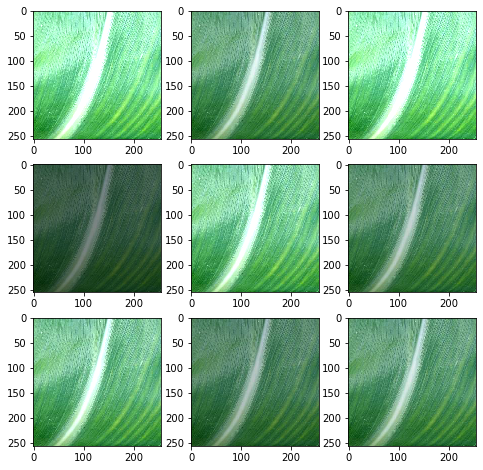

In [107]:
# Data augmentation example
# Healthy leaf image
img = load_img('./data/Healthy/Corn_Health (100).jpg')
data = img_to_array(img)
samples = np.expand_dims(data, 0)
# Demonstrating brightness augmentation
datagen = ImageDataGenerator(brightness_range=[0.4,1.5])
it = datagen.flow(samples, batch_size=1)

# Generate samples and plot
fig=plt.gcf()
fig.set_size_inches(ncols * 2, nrows * 2)
for i in range(9):
    plt.subplot(330 + 1 + i)
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

To ensure that our model can generalize to the validation data and not overfit to the training data, we will be randomly augmenting the training images using the methods shown above.

In [108]:
# Rescaling images by 1./255
# Splitting data into training and validation sets
# Performing data augmentation on training images
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   rotation_range=90, fill_mode='nearest',
                                   brightness_range=[0.4,1.5],
                                   validation_split = 0.2)

# Flow training images in batches
train_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        subset='training')

# Flow validation images in batches
validation_generator = train_datagen.flow_from_directory(
        './data',
        target_size=(200, 200),
        batch_size=batch_size,
        classes = classes,
        class_mode='categorical',
        subset='validation')

Found 3352 images belonging to 4 classes.
Found 836 images belonging to 4 classes.


In [109]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling second model with RMSprop optimizer
model_2.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
# Training sample count
training_sample=train_generator.n
    
# Validation sample count
val_sample=validation_generator.n

# Training second model
model_2.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 67s 636ms/step - loss: 12.6551 - acc: 0.5344 - val_loss: 0.4840 - val_acc: 0.7788
Epoch 2/30
104/104 [==============================] - 60s 578ms/step - loss: 0.5879 - acc: 0.7698 - val_loss: 0.3769 - val_acc: 0.8341
Epoch 3/30
104/104 [==============================] - 60s 580ms/step - loss: 0.4961 - acc: 0.8105 - val_loss: 0.3870 - val_acc: 0.8365
Epoch 4/30
104/104 [==============================] - 61s 588ms/step - loss: 0.4536 - acc: 0.8352 - val_loss: 0.3475 - val_acc: 0.8534
Epoch 5/30
104/104 [==============================] - 62s 594ms/step - loss: 0.4564 - acc: 0.8261 - val_loss: 0.3528 - val_acc: 0.8486
Epoch 6/30
104/104 [==============================] - 60s 580ms/step - loss: 0.4117 - acc: 0.8320 - val_loss: 0.3573 - val_acc: 0.8546
Epoch 7/30
104/104 [==============================] - 65s 624ms/step - loss: 0.4156 - acc: 0.8380 - val_loss: 0.3237 - val_acc: 0.8630
Epoch 8/30
104/104 [==============================] - 

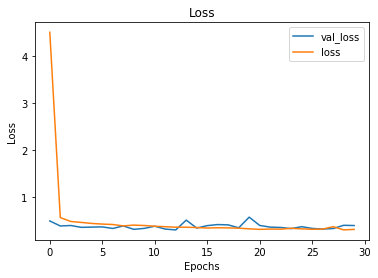

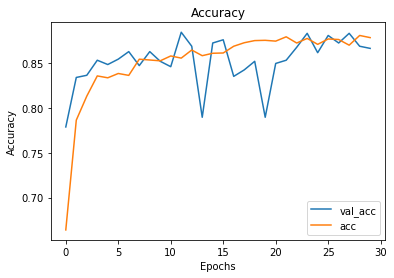

In [110]:
viz_train_res(model_2)

The data augmentation seems to have helped somewhat with the overfitting!

### CNN with One Convolutional Layer & Data Augmentation & Adam Optimizer

In [111]:
model_3 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling third model with adam optimizer
model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    
# Training third model
model_3.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 61s 582ms/step - loss: 8.4316 - acc: 0.5213 - val_loss: 0.3987 - val_acc: 0.8101
Epoch 2/30
104/104 [==============================] - 60s 578ms/step - loss: 0.4802 - acc: 0.8165 - val_loss: 0.4245 - val_acc: 0.8209
Epoch 3/30
104/104 [==============================] - 63s 604ms/step - loss: 0.4567 - acc: 0.8270 - val_loss: 0.4188 - val_acc: 0.8185
Epoch 4/30
104/104 [==============================] - 61s 589ms/step - loss: 0.3962 - acc: 0.8356 - val_loss: 0.4024 - val_acc: 0.8281
Epoch 5/30
104/104 [==============================] - 56s 535ms/step - loss: 0.3931 - acc: 0.8402 - val_loss: 0.3736 - val_acc: 0.8377
Epoch 6/30
104/104 [==============================] - 53s 512ms/step - loss: 0.3839 - acc: 0.8516 - val_loss: 0.3998 - val_acc: 0.8197
Epoch 7/30
104/104 [==============================] - 56s 534ms/step - loss: 0.3725 - acc: 0.8420 - val_loss: 0.3521 - val_acc: 0.8413
Epoch 8/30
104/104 [==============================] - 5

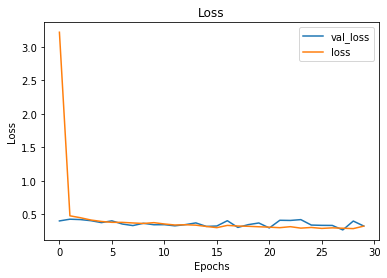

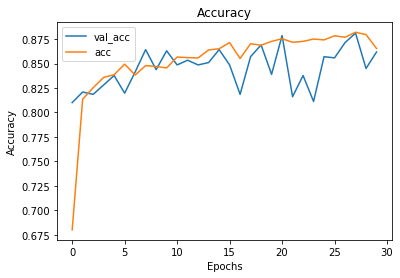

In [112]:
viz_train_res(model_3)

### CNN with Two Convolutional Layers & Data Augmentation

In [113]:
model_4 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling fourth model with RMSprop optimizer
model_4.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
# Training fourth model
model_4.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 64s 607ms/step - loss: 1.7297 - acc: 0.5756 - val_loss: 0.4398 - val_acc: 0.8149
Epoch 2/30
104/104 [==============================] - 63s 601ms/step - loss: 0.6231 - acc: 0.7644 - val_loss: 0.4517 - val_acc: 0.8425
Epoch 3/30
104/104 [==============================] - 62s 595ms/step - loss: 0.5200 - acc: 0.7986 - val_loss: 0.4322 - val_acc: 0.8185
Epoch 4/30
104/104 [==============================] - 62s 593ms/step - loss: 0.4730 - acc: 0.8185 - val_loss: 0.3521 - val_acc: 0.8522
Epoch 5/30
104/104 [==============================] - 63s 603ms/step - loss: 0.4386 - acc: 0.8309 - val_loss: 0.4959 - val_acc: 0.7885
Epoch 6/30
104/104 [==============================] - 62s 598ms/step - loss: 0.3832 - acc: 0.8400 - val_loss: 1.1035 - val_acc: 0.5829
Epoch 7/30
104/104 [==============================] - 63s 603ms/step - loss: 0.4023 - acc: 0.8401 - val_loss: 0.2784 - val_acc: 0.8930
Epoch 8/30
104/104 [==============================] - 6

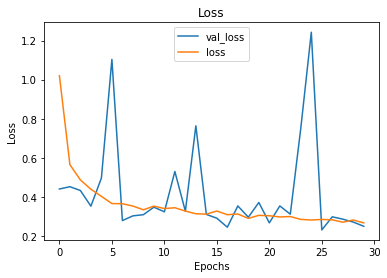

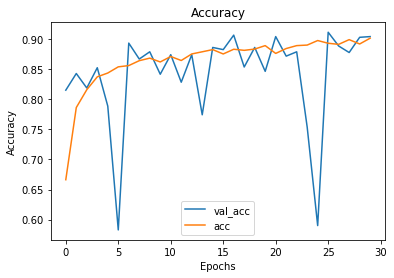

In [114]:
viz_train_res(model_4)

### CNN with Two Convolutional Layers & Data Augmentation & Adam Optimizer

In [115]:
model_5 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling fifth model with adam optimizer
model_5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    
# Training fifth model
model_5.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 62s 590ms/step - loss: 1.5667 - acc: 0.6217 - val_loss: 0.4356 - val_acc: 0.7945
Epoch 2/30
104/104 [==============================] - 60s 578ms/step - loss: 0.4598 - acc: 0.8089 - val_loss: 0.4360 - val_acc: 0.8269
Epoch 3/30
104/104 [==============================] - 61s 586ms/step - loss: 0.4270 - acc: 0.8273 - val_loss: 0.3551 - val_acc: 0.8582
Epoch 4/30
104/104 [==============================] - 62s 590ms/step - loss: 0.3561 - acc: 0.8540 - val_loss: 0.3169 - val_acc: 0.8606
Epoch 5/30
104/104 [==============================] - 66s 630ms/step - loss: 0.3196 - acc: 0.8778 - val_loss: 0.3773 - val_acc: 0.8510
Epoch 6/30
104/104 [==============================] - 65s 626ms/step - loss: 0.3369 - acc: 0.8568 - val_loss: 0.3272 - val_acc: 0.8678
Epoch 7/30
104/104 [==============================] - 63s 608ms/step - loss: 0.3176 - acc: 0.8753 - val_loss: 0.2783 - val_acc: 0.8750
Epoch 8/30
104/104 [==============================] - 6

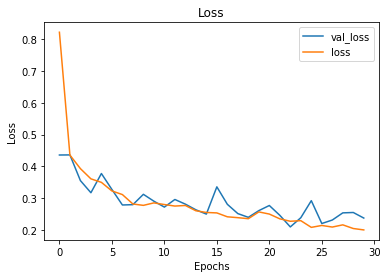

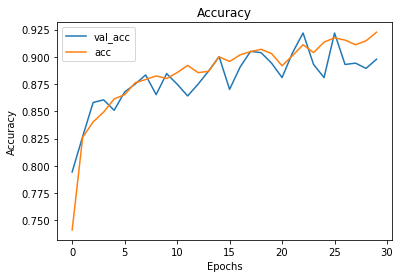

In [116]:
viz_train_res(model_5)

### CNN with Three Convolutional Layers & Data Augmentation

In [ ]:
model_6 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling sixth model with RMSprop optimizer
model_6.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
# Training sixth model
model_6.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
104/104 [==============================] - 70s 664ms/step - loss: 1.2778 - acc: 0.5599 - val_loss: 0.8237 - val_acc: 0.6442
Epoch 2/30
104/104 [==============================] - 66s 638ms/step - loss: 0.5955 - acc: 0.7751 - val_loss: 0.4645 - val_acc: 0.8077
Epoch 3/30
104/104 [==============================] - 66s 632ms/step - loss: 0.4723 - acc: 0.8224 - val_loss: 0.3005 - val_acc: 0.8618
Epoch 4/30
104/104 [==============================] - 66s 632ms/step - loss: 0.4050 - acc: 0.8301 - val_loss: 0.3272 - val_acc: 0.8630
Epoch 5/30
104/104 [==============================] - 60s 577ms/step - loss: 0.3890 - acc: 0.8426 - val_loss: 0.4050 - val_acc: 0.8233
Epoch 6/30
104/104 [==============================] - 64s 608ms/step - loss: 0.3513 - acc: 0.8601 - val_loss: 0.2948 - val_acc: 0.8690
Epoch 7/30
104/104 [==============================] - 66s 630ms/step - loss: 0.3468 - acc: 0.8575 - val_loss: 0.2615 - val_acc: 0.8954
Epoch 8/30
104/104 [==============================] - 6

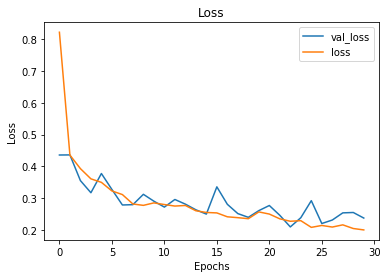

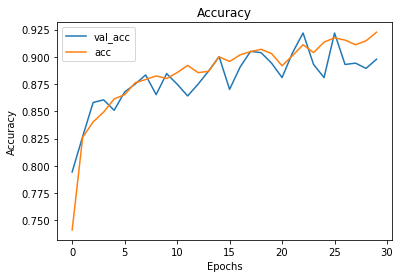

In [116]:
viz_train_res(model_6)

### CNN with Three Convolutional Layers & Data Augmentation & Adam Optimizer

In [ ]:
model_7 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling seventh model with adam optimizer
model_7.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
    
# Training seventh model
model_7.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

Epoch 1/30
 35/104 [=========>....................] - ETA: 37s - loss: 1.7517 - acc: 0.4755

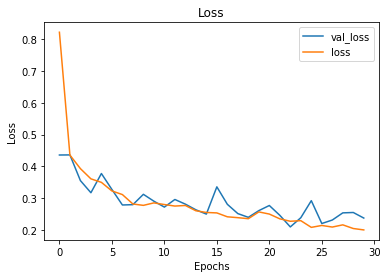

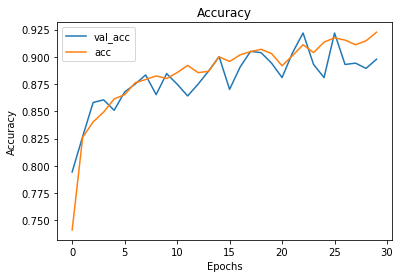

In [116]:
viz_train_res(model_7)

### CNN with 5 Convolutional Layers - Just for fun!

In [49]:
# a 5-layer CNN
model_8 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    # 4 output neurons for 4 classes
    tf.keras.layers.Dense(4, activation='softmax')
])

# Compiling eighth model with RMSprop optimizer
model_8.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])
    
# Training eighth model
model_8.fit(
        train_generator, 
        steps_per_epoch=int(training_sample/batch_size),
        validation_data = validation_generator,
        validation_steps = int(val_sample/batch_size),
        epochs=num_epochs,
        verbose=1)

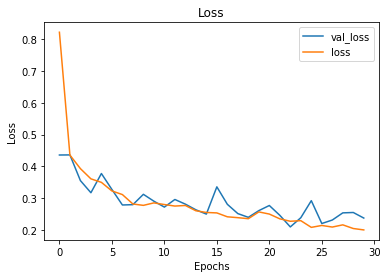

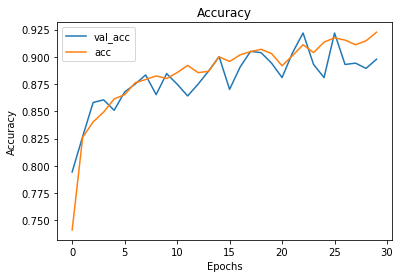

In [116]:
viz_train_res(model_8)